# 90°剥離試験の解析


 90dC_w_heatgun 
        0       1        2        3
0   0.00  25.480  113.820  166.630
1  54.79  86.590  166.690  132.690
2   4.49   0.475   11.478    4.573
[0.         0.12980228 0.32564667 0.21530039]


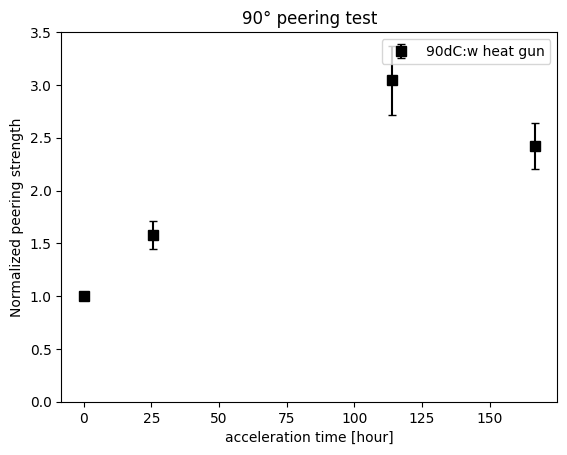

In [7]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#
#T_accel =['70dC_wo_heatgun','80dC','90dC_w_heatgun']
#fig, ax = plt.subplots()
#colors = ['black','green','blue','red']
#ntemp = T_accel.__len__()
#label_list = ['70dC:w/o heat gun' ,'80dC' ,'90dC:w heat gun','98']
#
#for itemp in range(ntemp):
#	temp_accel = T_accel[itemp]
#	filename = f'./peelingArchiveDir/peeling_{temp_accel}.csv'
#	df = pd.read_csv(filename,sep="\t"
#									 ,skiprows=1
#									 #,names=['1','2','3','4']
#									 ,header=None
#									 )
#	print("\n",temp_accel,"\n",df)
#	#weight_dataset = df.to_numpy()
#	#t_accel = weight_dataset[0]
#	#weight_break = weight_dataset[1]
#	#weight_err = weight_dataset[2]
#	#ax.errorbar(t_accel, weight_break, yerr=weight_err, capsize=3, fmt='s'
#	#            , ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
#	#            , label=label_list[itemp])
#
#	weight_dataset = df.to_numpy()
#	t_accel = weight_dataset[0]
#	initialBreakingWeight = weight_dataset[1][0]
#	initialBreakingWeightErr = weight_dataset[2][0]
#	breakingWeightRatio = weight_dataset[1]/initialBreakingWeight
#	weightRatioErr = breakingWeightRatio*np.sqrt(np.square(weight_dataset[2]/weight_dataset[1])+np.square(initialBreakingWeightErr/initialBreakingWeight))
#	weightRatioErr[0] = 0
#	print(weightRatioErr)
#	ax.errorbar(t_accel, breakingWeightRatio, yerr=weightRatioErr, capsize=3, fmt='s'
#				, ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
#				, label=label_list[itemp])
#
#ax.set_xlabel('acceleration time [hour]')
##ax.set_ylabel('adhesive power [g]')
#ax.set_ylabel('Normalized peeling strength')
##plt.yscale('log')
#plt.legend(loc='upper right')
#ax.set_title('90° peeling test')
#plt.ylim([0,3.5])
#plt.show()


## 設計変更

スプレッドシート：オフセット補正＋経過時間の計算\
以下Python			：DataFrameの作成＋統計量（平均と誤差率）の計算\
まずは、こんなcsvを手でつくる

header[90dC] \
time1			time2\
weight1-1	weight2-1	\
weigth1-2	weigth2-2	\
weigth1-3	weigth2-3	\
weigth1-4	weigth2-4	\ 

read_csvをして、各行ごとの「時間・平均・サンプル数」を別のdfに詰める。\
それとは別に分散(率)を計算し、全ての測定を利用した誤差率を計算する。\
標準誤差を計算してerrorbar付きプロット

     70dC  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0    0.00       8.420       7.770       8.310       8.020         NaN
1   43.20       3.820       4.410       3.955       4.205         NaN
2   95.32       4.845       4.535       4.830       5.555         NaN
3  163.72       4.515       5.230       5.195       4.745         NaN
   70dC_wo_warmup  sample1  sample2  sample3  sample4  Unnamed: 5  Unnamed: 6
0            0.00    4.225    5.335    5.405    5.655         NaN         NaN
1           30.07    4.885    5.135      NaN      NaN         NaN         NaN
2           96.58    5.875    5.520    5.725    5.980         NaN         NaN
3          140.92    5.300    5.700    5.415    5.815         NaN         NaN
4          196.62    5.775    5.655    4.855    4.705       4.125       4.715
     80dC  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0    0.00       8.420        7.77       8.310       8.020         NaN
1   58.70       4.845        5.00       5.

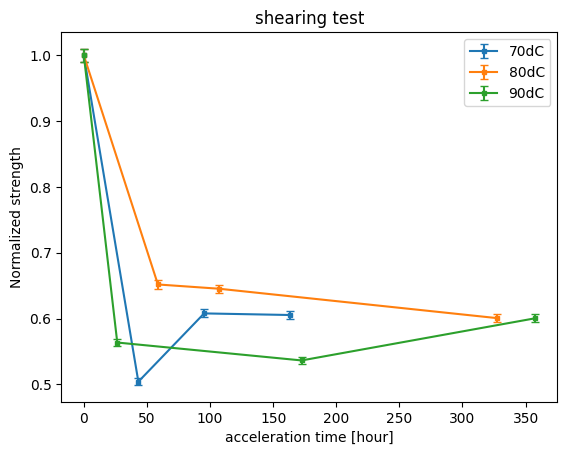

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

fig, ax = plt.subplots()
colors = ['orange','blue','green','red','brown']
errlist = [0.01394836*np.sqrt(2),0.00691378*np.sqrt(2)]#比の値について誤差の伝播則よりsqrt(2)が必要

type=1
typeOfTest=['peeling','shearing']
Rerr =errlist[type]
csv_files = sorted(glob.glob(typeOfTest[type]+'Table_*.csv'))

for itemp,file in enumerate(csv_files):
	df = pd.read_csv(file,sep="\t"
									 )
	print(df)
	temp_accel=df.columns.values[0]
	t_accel=df.iloc[:,0].to_numpy()
	weightMean=df.iloc[:,1:].mean(axis='columns').to_numpy()
	normalizedWight = weightMean/weightMean[0]
	if(temp_accel == '70dC_wo_warmup'):
		myformat = 's'
		continue
	elif(temp_accel == '90dC_w_heatgun'):
		continue
	else:
		myformat = '-s'
	ax.errorbar(t_accel,normalizedWight,yerr=normalizedWight*Rerr
						 , capsize=3
						 , fmt=myformat
						 #, ecolor=colors[itemp], color=colors[itemp]
						 ,ms=3 #, mec='k'
						 , label=temp_accel)

ax.set_xlabel('acceleration time [hour]')
ax.set_ylabel('Normalized strength')
#plt.yscale('log')
plt.legend(
	#loc='upper left'
	)
ax.set_title(f'{typeOfTest[type]} test')
# plt.ylim([0,1.5])
#plt.xscale("log")
plt.show()

# 平均値だけでなく生データもプロットする

     70dC  sample1  sample2  sample3  sample4
0    0.00   200.64  207.545  194.165  211.515
1   41.12    78.02   83.420   70.020   70.420
2   94.60    60.02   75.420   70.020   72.420
3  162.83    65.02   66.920   65.020   65.420
4  425.98    66.52   50.420   66.520   60.420
5  666.52   110.02   72.920   75.020   95.420
   70dC_wo_warmup  sample1  sample2  sample3  sample4
0            0.00   55.100    67.80   77.100   72.400
1           30.07   56.780    60.09   64.415   66.935
2           72.57   57.555    60.90   57.555   45.335
3          143.70   93.450    81.96   98.450  107.780
4          196.62   58.380    47.14   87.230   89.730
     80dC  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0    0.00      200.64     207.545     194.165     211.515         NaN
1   58.70      117.67     120.140     124.670     116.640         NaN
2  107.07      118.32     120.430     125.020     116.920         NaN
3  325.23       98.02      95.420      90.020     110.420         NaN
4  6

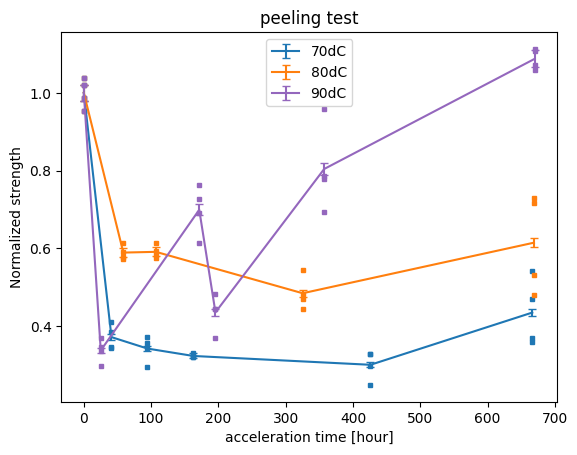

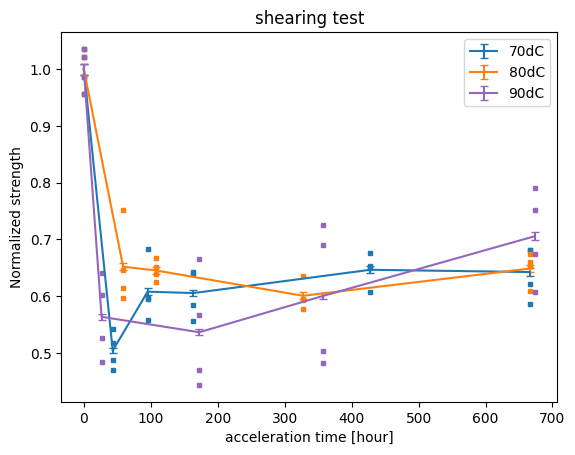

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

colors = ['tab:blue','red','tab:orange','tab:purple','tab:green']
errlist = [0.01394836*np.sqrt(2),0.00691378*np.sqrt(2)]#比の値について誤差の伝播則よりsqrt(2)が必要

for type in range(2):
	fig, ax = plt.subplots()
	typeOfTest=['peeling','shearing']
	Rerr =errlist[type]
	csv_files = sorted(glob.glob(typeOfTest[type]+'Table_*.csv'))

	for itemp,file in enumerate(csv_files):
		df = pd.read_csv(file,sep="\t"
										 )
		print(df)
		temp_accel=df.columns.values[0]
		t_accel=df.iloc[:,0].to_numpy()
		weightMean=df.iloc[:,1:].mean(axis='columns').to_numpy()
		weightRawData=df.iloc[:,1:].to_numpy()/weightMean[0]
		#print(weightRawData)
		normalizedWight = weightMean/weightMean[0]
		if(temp_accel == '70dC_wo_warmup' or temp_accel == '90dC_w_heatgun'):
			continue
		myformat = 's'
		ax.plot(t_accel, weightRawData,marker='s',ms=2.5 ,linestyle='',color=colors[itemp])
		myformat = '-'
		ax.errorbar(t_accel,normalizedWight,yerr=normalizedWight*Rerr
							 , capsize=3
							 , fmt=myformat
							 , ecolor=colors[itemp], color=colors[itemp]
							#  ,ms=3 , mec='k'
							 , label=temp_accel)

	ax.set_xlabel('acceleration time [hour]')
	ax.set_ylabel('Normalized strength')
	#plt.yscale('log')
	plt.legend(
		#loc='upper left'
		)
	ax.set_title(f'{typeOfTest[type]} test')
#plt.ylim([0,1.5])
#plt.xscale("log")
plt.show()

## 分散から誤差率の計算

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

typeOfTest=['peeling','shearing']
csv_files = sorted(glob.glob(typeOfTest[1]+'Table_*.csv'))

numerator=[0]
denominator=[0]
for itemp,file in enumerate(csv_files):
	df = pd.read_csv(file,sep="\t")
	df_weight = df.iloc[:,1:]
	print("df = ",df)
	#print("df_weight = ",df_weight)
	nsampleArray = df_weight.count(axis=1).to_numpy()
	print("nsampleArray = ",nsampleArray)
	weightMean=df_weight.mean(axis='columns').to_numpy()
	weightVariance=df_weight.var(axis='columns',ddof=1).to_numpy()
	weightVarianceRate = weightVariance/weightMean
	print("weightMean = ",weightMean)
	print("weightVariance = ",weightVariance)
	print("weightVarianceRate= ",weightVarianceRate)

	numerator += ((nsampleArray-1)/(2*weightVarianceRate)).sum()
	denominator += ((nsampleArray-1)/(2*np.square(weightVarianceRate))).sum()
print(numerator/denominator)

df =     70dC_wo_heatgun  sample1  sample2  sample3  sample4  Unnamed: 5  Unnamed: 6
0             0.00    4.225    5.335    5.405    5.655         NaN         NaN
1            30.07    4.885    5.135      NaN      NaN         NaN         NaN
2            96.58    5.875    5.520    5.725    5.980         NaN         NaN
3           140.92    5.300    5.700    5.415    5.815         NaN         NaN
4           196.62    5.775    5.655    4.855    4.705       4.125       4.715
nsampleArray =  [4 2 4 4 6]
weightMean =  [5.155      5.01       5.775      5.5575     4.97166667]
weightVariance =  [0.40326667 0.03125    0.03985    0.05774167 0.39594667]
weightVarianceRate=  [0.07822826 0.00623752 0.00690043 0.01038986 0.07964063]
df =       80dC  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0    0.00       8.420        7.77       8.310       8.020         NaN
1   58.70       4.845        5.00       5.245       6.105         NaN
2  107.07       5.290        5.20       5.075       